In [2]:
import pathlib
import os

import numpy as np
import tqdm
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
dataset_dir = "C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly\hair1\\NG_Clip"
file_name = 'NG_1.jpg'

img = Image.open(os.path.join(dataset_dir, file_name))

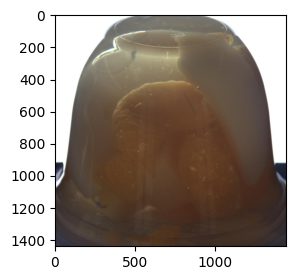

In [4]:
fig = plt.figure(figsize=(3, 3))
plt.imshow(img)

In [5]:
x = torch.arange(0, 9).reshape(1, 3, 3)
x

tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])

In [6]:
out = x.unfold(1, 2, 1)
out.shape

torch.Size([1, 2, 3, 2])

In [7]:
out

tensor([[[[0, 3],
          [1, 4],
          [2, 5]],

         [[3, 6],
          [4, 7],
          [5, 8]]]])

In [8]:
out = out.unfold(2, 2, 1)

In [9]:
out.shape

torch.Size([1, 2, 2, 2, 2])

In [10]:
patches = out.reshape(1, -1, 2, 2)

In [11]:
img = np.expand_dims(np.asarray(img, np.float32).transpose([2, 0, 1]), axis=0) /255.

In [12]:
img = torch.from_numpy(img)

In [13]:
PATCH_SIZE = 225
STRIDE = 30

unfolded_img = img.unfold(2, PATCH_SIZE, STRIDE).unfold(3, PATCH_SIZE, STRIDE)

In [14]:
unfolded_img.shape

torch.Size([1, 3, 41, 41, 225, 225])

In [15]:
out = unfolded_img.permute([0, 2, 3, 1, 4, 5]).reshape(-1, 3, PATCH_SIZE, PATCH_SIZE)

In [16]:
torchvision.utils.save_image(out, "sample.jpg")

In [100]:
out.shape

torch.Size([1681, 3, 225, 225])

In [106]:
len(np.random.randint(0, out.shape[0], size=out.shape[0]))

1681